## Dimensionality Reduction 


In this notebook the use of various methods for dimensionality reduction for visualization is investigated. The audio features are calculated using Marsyas, an open source software for audio analysis. The points are colored in terms of their class membership. There are three genres each represented by a 100 tracks (instances) or points in this case. The genres are classical, jazz and metal. 

The term timbrespace can be used for these displays in which the position of individual audio recordings in a large collection reflect their content-based similarities. 


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

### Principal Component Analysis 

In PCA the data is projected in a lower dimensional space. In this case the data loaded contains a full set of features. There are 300 instances and each instances has 124 features. After PCA we retain the first three PCA directions effectively reducing the dimensionality from 124 to 3. As can be seen from the 3D scatter plot 
where the points are visualized with color based on their corresponding genre, the structure of the data in terms of genre is visible. 

In [2]:
(X, y) = datasets.load_svmlight_file("data/3genres_full.arff.libsvm")
print(X.shape)
print(y.shape)

(300, 124)
(300,)


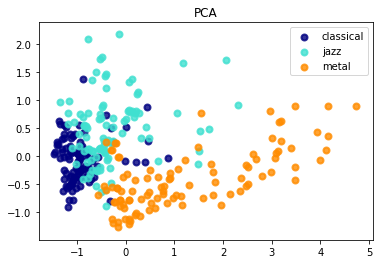

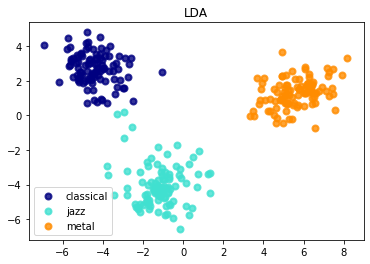

/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


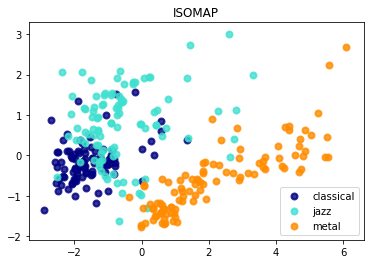

/Users/jshier/opt/anaconda3/envs/CSC475/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


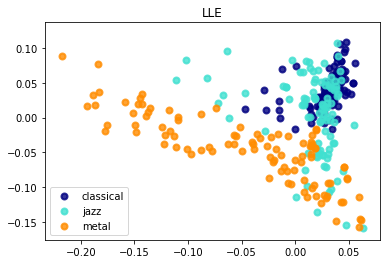

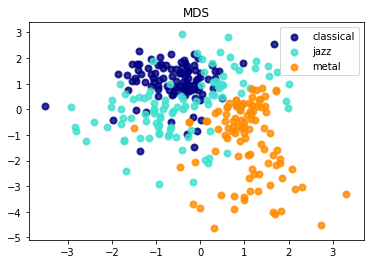

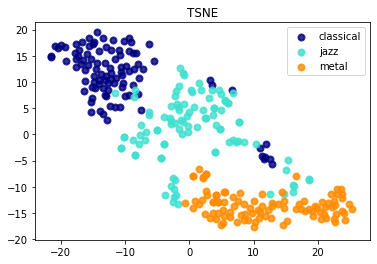

In [3]:

X = X.toarray()
X = MinMaxScaler().fit_transform(X)
target_names = ['classical', 'jazz', 'metal']
colors = ['navy', 'turquoise', 'darkorange']

def plot_scatter(X, title): 
    lw = 2
    #fig = plt.figure(1, figsize=(8, 6))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, 
                    lw=lw, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()


# Two dimensional PCA 
X_pca = PCA(n_components=2).fit_transform(X)
plot_scatter(X_pca, 'PCA')

# Two dimensional LDA 
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X,y)
plot_scatter(X_lda, 'LDA')

# Isomap 
n_neighbors = 30
X_iso = Isomap(n_neighbors, n_components=2).fit_transform(X)
plot_scatter(X_iso, 'ISOMAP')

# Locally Linear Embedding 
clf = LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
X_lle = clf.fit_transform(X)
plot_scatter(X_lle, 'LLE')

clf = MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
plot_scatter(X_mds, 'MDS')


tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plot_scatter(X_tsne, 'TSNE')

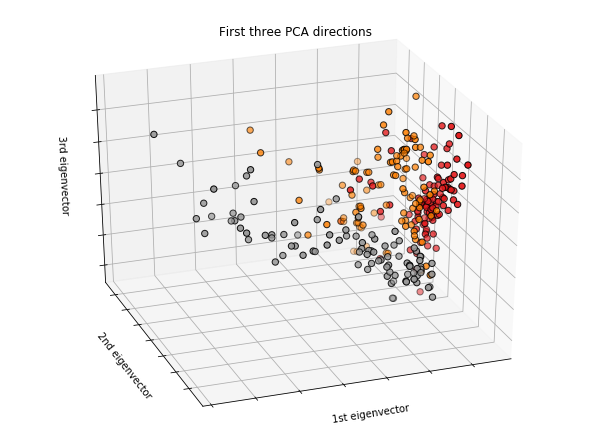

In [4]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [5]:
tsne = TSNE(n_components=3, init='pca', random_state=0)
print("Starting TSNE computation")
X_tsne = tsne.fit_transform(X)
print("Computation of TSNE finished")

Starting TSNE computation
Computation of TSNE finished


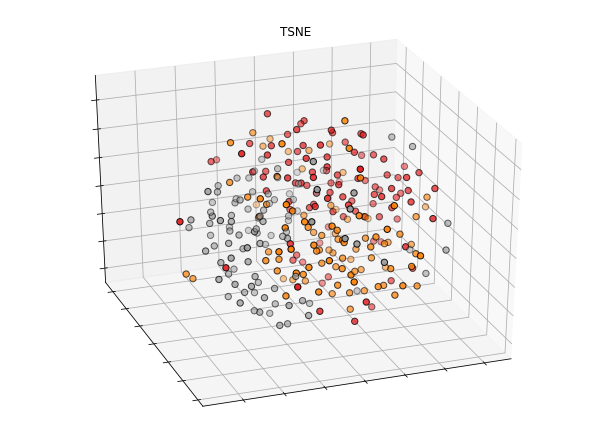

In [6]:

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("TSNE")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()